# Monte Carlo Positioning

We will learn how to program vehicles with the ability to sense their own location, and the locations of other vehicles, using sensors and algorithms.

In this lecture we will learn to sense locations with Monte Carlo positioning.

![http://www.fix.com/blog/driverless-car-revolution/](driverless-car.png "Driverless Car")


In [3]:
%matplotlib inline 

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def show_world(ax, lw=5):
    #show a world with lw cells
    
    ax.bar(np.arange(lw), np.ones(lw), 1, linewidth=3)
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(lw)+0.5)
    #ax.set_xlim([-0.1, 5.1])
    #ax.set_ylim([0, 110])
    ax.set_xticklabels(np.arange(lw)+1)
    plt.yticks([])

def showbar(ax, center=range(1,6,1), height=0.5, bottom=0.25, color='red'):
    #show markers on the positions (center)
    
    ax.bar(np.array(center)-1+0.1, height, bottom=bottom, color=color, linewidth=3)

## Discrete 1D World

Rather than start from a vehicle in continuous 3D world, we are going to consider a dicrete 1D world firstly.

Image a train on the track,  where it is only possible to move forward or backwards; sideways motion is impossible. The measurement is so rough that there are only 5 positions. If there are more accurate measurement methods, we may divide the track into 500 intervals.

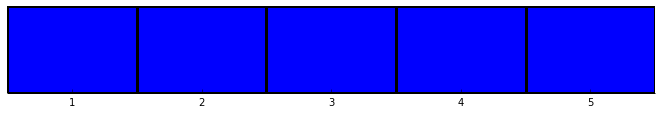

In [5]:
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)

## Deterministic World

The world is also deterministic, which means that the train is at one of the positions with the probability of 100%.

Let us try to locate it. Assume for some reason we know it starts from cell 1, but the measurement tells us that it is at cell 5. So where is it on earth?
* Prior: cell 1 (in red)
* Measurement: cell 5 (in green)
* Posterior: ?

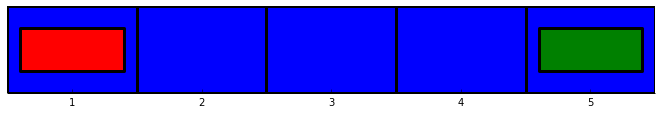

In [6]:
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)
# Prior position: cell 1 (in red)
showbar(ax, 1, color='red')
# Measurement: cell 5 (in green)
showbar(ax, 5, color='green')

## Posterior position? 

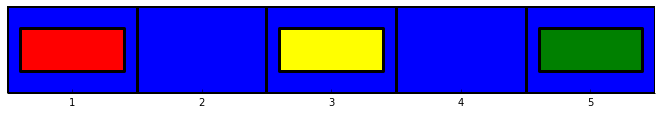

In [7]:
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)
# Prior position: cell 1 (in red)
showbar(ax, 1, color='red')
# Measurement: cell 5 (in green)
showbar(ax, 5, color='green')

# Posterior position: cell 3 (in yellow)
showbar(ax, 3, color='yellow')

Just the middle of cell 1 and cell 5, that is, cell 3?

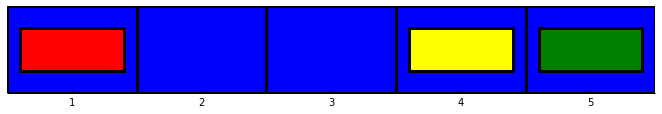

In [8]:
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)
# Prior position: cell 1 (in red)
showbar(ax, 1, color='red')
# Measurement: cell 5 (in green)
showbar(ax, 5, color='green')

# Posterior position: cell 4 (in yellow)
showbar(ax, 4, color='yellow')

Closer to cell 5, that is, cell 4?

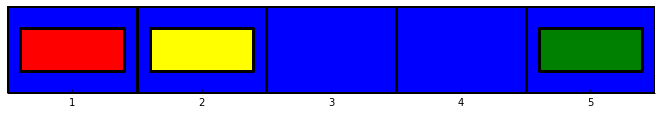

In [9]:
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)
# Prior position: cell 1 (in red)
showbar(ax, 1, color='red')
# Measurement: cell 5 (in green)
showbar(ax, 5, color='green')

# Posterior position: cell 2 (in yellow)
showbar(ax, 2, color='yellow')

Closer to cell 1, that is, cell 2?

## Probabilistic World

* Prior: [0.2, 0.5, 0.2, 0.05, 0.05] (in red)

* Measurement: [0.05, 0.05, 0.1, 0.7, 0.1] (in green)

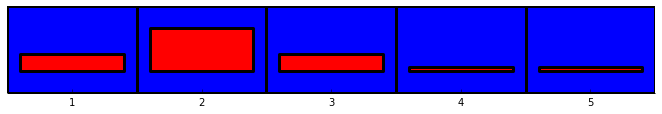

In [10]:
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)
# Prior: (in red)
prior_p = [0.2, 0.5, 0.2, 0.05, 0.05]
showbar(ax, height=prior_p, color='red')

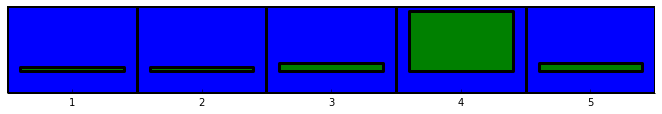

In [25]:
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)

pmea = [0.05, 0.05, 0.1, 0.6, 0.2] # Measurement
showbar(ax, height=pmea, color='green')

* Posterior: prior probability * measurement probabilit ?

In [27]:
post_p = np.array(pmea)*np.array(prior_p)
print post_p

[ 0.01   0.025  0.02   0.035  0.005]


* Posterior: prior probability * measurement probability / sum

In [28]:
post_p = post_p / sum(post_p)
#print 'Sum of Posterior: ',sum(post_p)
print 'Posterior: ', post_p

Posterior:  [ 0.10526316  0.26315789  0.21052632  0.36842105  0.05263158]


Posterior:  [ 0.10526316  0.26315789  0.21052632  0.36842105  0.05263158]


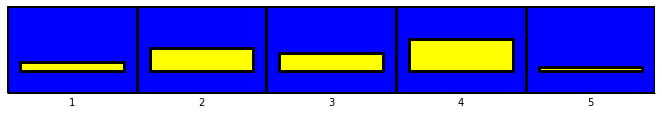

In [29]:
def meas(prior_p, pmea):
    post_p = np.array(pmea)*np.array(prior_p)
    post_p = post_p / sum(post_p)
    return post_p

ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)

post_p = meas(prior_p, pmea)
print 'Posterior: ', post_p
showbar(ax, height=post_p, color='yellow')

## Motion

* Accurate: shifting

In [30]:
def move(p, step):
    q= [ ] #Start with empty list
    for i in range(len(p)):
        q.append(p[(i-step) % len (p)]) #cycle
    return np.array(q)

print 'P: \n', post_p
p_after_move1 = move(post_p, 1)
print 'P after moving 1 step: \n', p_after_move1

P: 
[ 0.10526316  0.26315789  0.21052632  0.36842105  0.05263158]
P after moving 1 step: 
[ 0.05263158  0.10526316  0.26315789  0.21052632  0.36842105]


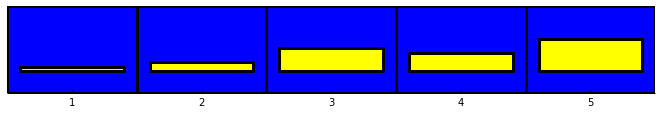

In [15]:
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)

showbar(ax, height=p_after_move1, color='yellow')

* Inaccurate: convolution

$P(X_{i+s} \mid X_i)=0.8$

$P(X_{i+s+1} \mid X_i)=0.1$

$P(X_{i+s-1} \mid X_i)=0.1$

s: step

* Exact position

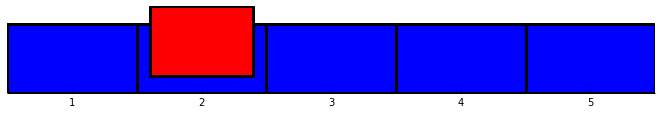

In [16]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)

# original: cell 2
showbar(ax, 2, height=1, color='red')

* Move 1

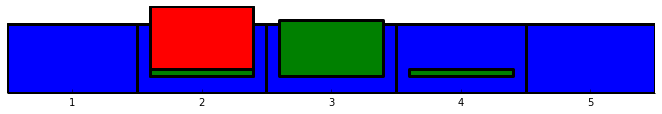

In [17]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)

# original: cell 2
showbar(ax, 2, height=1, color='red')

# after move 1 
s = 1
newpos = 2 + s + np.array([-1, 0, 1])
move_prob = [0.1, 0.8, 0.1]
showbar(ax, newpos, height=move_prob, color='green')

* Move 2

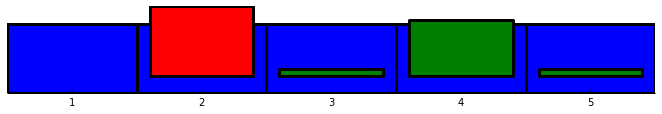

In [18]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)

# original: cell 2
showbar(ax, 2, height=1, color='red')

# after move 2 
s = 2
newpos = 2 + s + np.array([-1, 0, 1])
move_prob = [0.1, 0.8, 0.1]
showbar(ax, newpos, height=move_prob, color='green')

* Inaccurate position

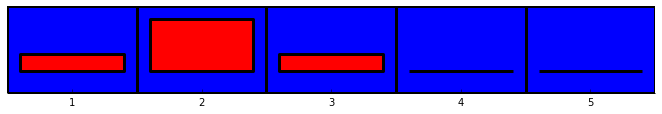

In [19]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)

# original:
ini_pos = [0.2, 0.6, 0.2, 0, 0]
showbar(ax, height=ini_pos, color='red')

In [20]:
def move_v2(p, step):
    #Introduce auxiliary variable s
    q= []
    #Add exact probability
    pExact = 0.8
    #Add overshoot probability
    pOvershoot = 0.1
    #Add undershoot probability
    pUndershoot = 0.1

    for i in range(len(p)):
        s = pExact * p[(i-step) % len(p)]
        s = s + pOvershoot * p[(i-step-1) % len(p)]
        s = s + pUndershoot * p[(i-step+1) % len(p)]
        q.append(s)
    return q

P: 
[0.2, 0.6, 0.2, 0, 0]
P after moving: 
[0.020000000000000004, 0.22000000000000003, 0.52, 0.22000000000000003, 0.020000000000000004]


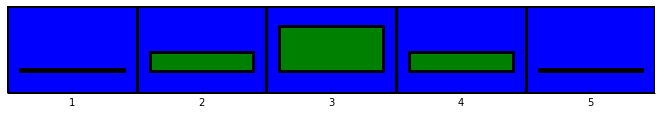

In [21]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)

# original:
ini_pos = [0.2, 0.6, 0.2, 0, 0]

# after move 2 
s = 1
print 'P: \n', ini_pos
p_after_move = move_v2(ini_pos, s)
print 'P after moving: \n', p_after_move
showbar(ax, height=p_after_move, color='green')

## Iterate Measurement + Motion 

[ 0.04819277  0.24096386  0.6746988   0.02409639  0.01204819]


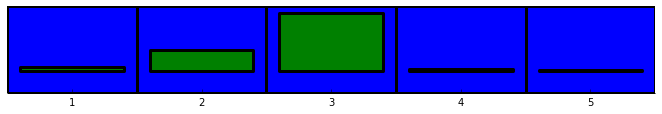

In [22]:
# Prior
prior_p = [0.2, 0.5, 0.2, 0.05, 0.05]
# Measurement 1
pmea1 = [0.05, 0.1, 0.7, 0.1, 0.05] # Measurement
# Moves right 1
s1 = 1
# Measurement 2
pmea2 = [0.05, 0.05, 0.1, 0.7, 0.1] # Measurement
# Moves right 2
s2 = 2
# Measurement 3
pmea3 = [0.7, 0.1, 0.05, 0.05, 0.1 ] # Measurement

post_p1 = meas(prior_p, pmea1)
print post_p1
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)
showbar(ax, height=post_p1, color='green')

[0.016867469879518079, 0.063855421686747002, 0.2650602409638555, 0.56626506024096379, 0.087951807228915671]


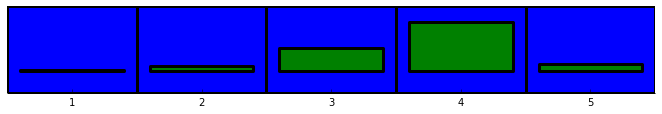

In [21]:
post_p2 = move_v2(post_p1, s1)
print post_p2
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)
showbar(ax, height=post_p2, color='green')

[ 0.00193557  0.00732753  0.0608323   0.90971934  0.02018526]


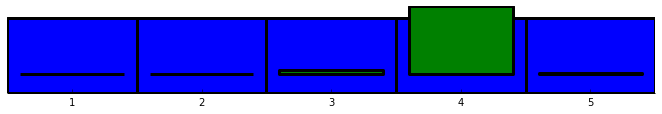

In [22]:
post_p3 = meas(post_p2, pmea2)
print post_p3
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)
showbar(ax, height=post_p3, color='green')

[0.73587722936540856, 0.10731370109221623, 0.0042997373150836463, 0.012138808240011068, 0.14037052398728056]


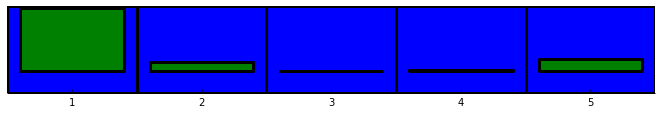

In [23]:
post_p4 = move_v2(post_p3, s2)
print post_p4
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)
showbar(ax, height=post_p4, color='green')

[  9.52672201e-01   1.98470179e-02   3.97605164e-04   1.12249947e-03
   2.59606767e-02]


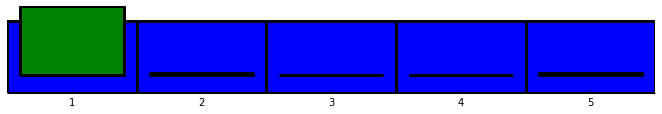

In [24]:
post_p5 = meas(post_p4, pmea3)
print post_p5
ax = plt.figure().add_axes((0.1, 0.2, 1.5, 0.3))
show_world(ax)
showbar(ax, height=post_p5, color='green')

## Positioning: Iteration of Measurement + Motion
* Measurement: Production followed by normalization

  Bayes's rule

  $P(x|Z)=\frac{P(Z|x)P(x)}{P(Z)}$

  x=cell

  Z=measurement

  $P(x|Z)=$probability of cell after measurment

  $P(x)=$probability of cell before measurment

  $P(Z|x)=$probability of measurment on the condition of cell

  $P(Z)=\sum P(Z|x)P(x)$total probability of making measurement "Z"

* Motion: Convolution
  
  Theorem of Total Probability
  
  $P(x_i^{t})=\sum_jP(x_j^{t-1})P(x_i|x_j)$
  
  $P(x_i|x_j)=$probability of moving from cell $x_j$ to cell $x_i$
  
  $t=$time

## Resources

* [1] https://docs.python.org/2.7/
* [2] http://ipython.org/documentation.html
* [3] http://nbviewer.ipython.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb
* [4] http://docs.scipy.org/doc/numpy/reference/
* [5] http://docs.scipy.org/doc/scipy/reference/
* [6] http://matplotlib.org/contents.html

In [1]:
# Install the version_information package using pip:
# pip install version_information
# or, alternatively, use the %install_ext IPython command (deprecated):
# %install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

%load_ext version_information
%version_information scipy, numpy, matplotlib

Software versions
Python 2.7.11+ 64bit [GCC 5.3.1 20160429]
IPython 5.1.0
OS Linux 4.4.0 2 deepin amd64 x86_64 with debian 8.0
scipy 0.18.0
numpy 1.11.1
matplotlib 1.5.2
Sun Sep 18 22:16:56 2016 CST